In [28]:
import pandas as pd
import h5py
import jieba as jb
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
from keras.layers import Layer
import keras.backend as K
from keras.layers import Input,Embedding,Bidirectional,LSTM,Concatenate,Dense,Dropout,Activation
from keras import Sequential
import keras

In [2]:
df = pd.read_csv('PsyQA.csv')
df

,question,description,keywords,answer_text
0,高三后的迷茫，高考前的恐惧，能给我一些建议么？,现在的我，感觉就像是从自己出生以来就是多余的，我就不应该出现在这个世界，现在就读高三的我，面...,"成长,压力管理,工作学习,学生成长",抱抱~看到你的提问感觉你很焦虑，这个状态在高中高压下很容易出现。我想说的是，我看到了你的决心...
1,察觉到一种模式，我总喜欢自己检讨、批评自己？,我和我妈妈讲话会陷入一种很恶心的模式。我只要说遇到的烦恼她是无动于衷的，但是我一旦开始批评自...,"家庭,家庭创伤,成长过程,家人控制",楼主你好，看到你习惯性检讨自己，批评自己，我感到很心疼。看到你这种模式会出现在和妈妈的对话中...
2,高四，社恐，该不该分心去交点朋友，还是就保持高冷？,社恐挺严重，不喜欢离开舒适区，感觉和陌生同学交流需要很大勇气。我是应该认真学习独来独往，还是...,"人际,社交恐惧",楼主你好，看到你在犹豫要不要交朋友。高四的你应该是去到了完全陌生的班级，他们已经有自己的朋友...
3,心里其实是很抗拒的，怎么提高执行力？,想做的事情很多，一直在想却没有行动，怎么才能让自己行动起来呢？心里其实是很抗拒的，但是怎么才...,"成长,自我成长,人生意义",楼主你好，看到你有很多想做的事情，但是却没有行动起来。对自己没有行动这件事，内心也是很抗拒的...
4,新初中生，总是和妈妈闹矛盾，但又做不出行动怎么办？,长大了总喜欢跟家长顶嘴妈妈总说我顶嘴顶的很没道理但是憋着我也很不爽。妈妈很为我的学业担忧才初...,"成长,自我成长,自我接纳,学生成长",题主，你好，抱抱你呀～看了你的描述，你很不想影响到妈妈心情，但是在无意中挑起了争端，真的很能...
...,...,...,...,...
22336,除了必要的聚会，喜欢一个人独处，很怪吗？,平时休息或者节假日，我除去必要的聚会以外，就喜欢自己宅在家里，做自己喜欢的事，我的爱好很多，...,"人际,社交恐惧,人际边界",看到你问“这样真的很怪吗”？我想知道，如果很怪，会怎样？如果不是很怪，又会怎样呢？怪还是不怪...
22337,在家得不到关爱应不应该离家出走、一刀两断？,心累心里非常痛心里非常难受感觉在家非常难受应不应该离家出走一刀两断,"家庭,家庭关系",在中国家庭，的确家是不讲理，家也最伤人。但是家是社会基本做成单元。家能提供的温暖和爱，还是很...
22338,男朋友总是不做家务，要说好久才行动，怎么办？,男朋友总是不喜欢做家务，有时候让他做点什么，要说好久才行动，而且从不多做，多说几句就说你爱做...,"恋爱,恋爱经营",很理解题主的感受。遇到这样的事，很多人无法接受，尤其在当今社会，女士也跟男士一样，出去工作，...
22339,为什么亲密关系中一发生冲突，我就想断绝来往？,为什么我的亲密关系中一发生冲突，就想断绝来往了。删掉所有我为他做的事，事后有很后悔，可以继续...,"人际,沟通,矛盾冲突",你觉察到自己承受痛苦的能力很小，觉察到自己在亲密关系中面对冲突时的行为模式。就像你说的一样，...


## 数据处理

In [3]:
df[['keywords','subkey']] = df['keywords'].str.split(',',n=1,expand=True) # 获取主标签
classes = df['keywords'].unique() # 获取唯一值
classes

array(['成长', '家庭', '人际', '治疗', '行为', '恋爱', '情绪', '婚姻', '职业'], dtype=object)

In [4]:
# 将标砖转换为one-hot的形式
from tensorflow.keras.utils import to_categorical
encoder = LabelEncoder()
encoder.fit(classes)
encoded_target = encoder.transform(df['keywords'])
Y = krs.utils.np_utils.to_categorical(encoded_target)

In [5]:
# 查看不同的标签对应的数组位置
encoded_target

array([5, 2, 0, ..., 3, 0, 1])

In [6]:
# 按照encode的结果,重新设置类别顺序
classes = ['人际','婚姻','家庭','恋爱','情绪','成长','治疗','职业','行为']

In [7]:
# 数值处理,将文本中多余的标点去除
text = df['question'] # 预测文本为问题
text = text.str.replace('、', '')
text = text.str.replace('，', '')
text = text.str.replace('？', '')
text = text.str.replace('……', '')
text = text.str.replace('+', '')
text = text.str.replace('（', '')
text = text.str.replace('）', '')
text = text.str.replace('“', '')
text = text.str.replace('”', '')
text = text.str.replace('！', '')
text

<ipython-input-7-dfe1d939aec2>:7: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  text = text.str.replace('+', '')


0          高三后的迷茫高考前的恐惧能给我一些建议么
1           察觉到一种模式我总喜欢自己检讨批评自己
2         高四社恐该不该分心去交点朋友还是就保持高冷
3              心里其实是很抗拒的怎么提高执行力
4        新初中生总是和妈妈闹矛盾但又做不出行动怎么办
                  ...          
22336         除了必要的聚会喜欢一个人独处很怪吗
22337       在家得不到关爱应不应该离家出走一刀两断
22338       男朋友总是不做家务要说好久才行动怎么办
22339      为什么亲密关系中一发生冲突我就想断绝来往
22340        我该遵循自己的内心还是照顾男友的感受
Name: question, Length: 22341, dtype: object

In [8]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

text = ['.'.join(jb.cut(t, cut_all=True)) for t in text] # 使用jieba分词
tokenizer = Tokenizer() # 定义tokenizer
tokenizer.fit_on_texts(text) # 输入文本,获得字典
text_digit = tokenizer.texts_to_sequences(text) # 将输入文化化为对应的数字序列
vocab_size = len(tokenizer.word_index) + 1 # 记录总词数
# 打印第一个序列,文本和总词数
print(text_digit[0]) 
print(text[0]) 
vocab_size 

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\Public\Documents\Wondershare\CreatorTemp\jieba.cache
Loading model cost 1.479 seconds.
Prefix dict has been built successfully.


[169, 79, 1, 163, 232, 1263, 1, 132, 105, 154, 2, 226, 884, 446]
高三.后.的.迷茫.高考.考前.的.恐惧.能.给.我.一些.建议.么


16690

In [9]:
txt_lenth = 15 # 选取前15个词为输入
embedding_size = 50 # Embedding层输出的维度

In [10]:
# 将输入文本序列扩充为列长为15的矩阵，空缺值为0
text_digit = pad_sequences(text_digit, maxlen=txt_lenth, padding='post') 
text_digit 

array([[ 169,   79,    1, ...,  884,  446,    0],
       [2709, 6597,  421, ...,    0,    0,    0],
       [ 230, 2710,  694, ...,  515,  230, 1780],
       ...,
       [  76,   21,   25, ...,    3,    4,    0],
       [   7,  308,  462, ..., 2824, 6256, 3504],
       [   2,   11, 4469, ...,    0,    0,    0]])

## 构建模型

In [11]:
# 划分训练集和测试集
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(text_digit, Y, test_size=0.2, random_state=42)

### 带Attention和Concatenate的模型

In [36]:
class Attention(tf.keras.Model):
    def __init__(self, units):
        super(Attention, self).__init__()
        self.W1 = tf.keras.layers.Dense(units)
        self.W2 = tf.keras.layers.Dense(units)
        self.V = tf.keras.layers.Dense(1)

    def call(self, features, hidden):
        # hidden shape == (batch_size, hidden size)
        # hidden_with_time_axis shape == (batch_size, 1, hidden size)
        # we are doing this to perform addition to calculate the score
        hidden_with_time_axis = tf.expand_dims(hidden, 1)
          
        # score shape == (batch_size, max_length, 1)
        # we get 1 at the last axis because we are applying score to self.V
        # the shape of the tensor before applying self.V is (batch_size, max_length, units)
        score = tf.nn.tanh(
            self.W1(features) + self.W2(hidden_with_time_axis))
        # attention_weights shape == (batch_size, max_length, 1)
        attention_weights = tf.nn.softmax(self.V(score), axis=1)
          
        # context_vector shape after sum == (batch_size, hidden_size)
        context_vector = attention_weights * features
        context_vector = tf.reduce_sum(context_vector, axis=1)
        return context_vector, attention_weights

In [45]:
sequence_input = Input(shape=(txt_lenth,), dtype="int32")
embedded_sequences = Embedding(vocab_size, embedding_size, input_length=txt_lenth)(sequence_input)
lstm = Bidirectional(LSTM(128, return_sequences = True), name="bi_lstm_0")(embedded_sequences)

# Getting our LSTM outputs
(lstm, forward_h, forward_c, backward_h, backward_c) = Bidirectional(LSTM(128, return_sequences=True, return_state=True), name="bi_lstm_1")(lstm)

state_h = Concatenate()([forward_h, backward_h])
state_c = Concatenate()([forward_c, backward_c])

context_vector, attention_weights = Attention(10)(lstm, state_h)
dense1 = Dense(20, activation="relu")(context_vector)
dropout = Dropout(0.05)(dense1)
output = Dense(9, activation="softmax")(dropout)
  
model2 = keras.Model(inputs=sequence_input, outputs=output)
model2.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"]) # 输出层

print(model2.summary())

Model: "model_5"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_6 (InputLayer)           [(None, 15)]         0           []                               
                                                                                                  
 embedding_8 (Embedding)        (None, 15, 50)       834500      ['input_6[0][0]']                
                                                                                                  
 bi_lstm_0 (Bidirectional)      (None, 15, 256)      183296      ['embedding_8[0][0]']            
                                                                                                  
 bi_lstm_1 (Bidirectional)      [(None, 15, 256),    394240      ['bi_lstm_0[0][0]']              
                                 (None, 128),                                               

In [46]:
# 训练模型
history2 = model2.fit(text_digit, Y, validation_split = 0.2,batch_size=56, epochs=20)

Epoch 1/20
320/320 [==============================] - 27s 57ms/step - loss: 1.8769 - accuracy: 0.2921 - val_loss: 1.5894 - val_accuracy: 0.4285
Epoch 2/20
320/320 [==============================] - 20s 63ms/step - loss: 1.4708 - accuracy: 0.4716 - val_loss: 1.5077 - val_accuracy: 0.4710
Epoch 3/20
320/320 [==============================] - 22s 67ms/step - loss: 1.2265 - accuracy: 0.5796 - val_loss: 1.4786 - val_accuracy: 0.4981
Epoch 4/20
320/320 [==============================] - 20s 64ms/step - loss: 0.9892 - accuracy: 0.6790 - val_loss: 1.5216 - val_accuracy: 0.5021
Epoch 5/20
320/320 [==============================] - 21s 65ms/step - loss: 0.8015 - accuracy: 0.7504 - val_loss: 1.6328 - val_accuracy: 0.5008
Epoch 6/20
320/320 [==============================] - 22s 68ms/step - loss: 0.6691 - accuracy: 0.7986 - val_loss: 1.6800 - val_accuracy: 0.4923
Epoch 7/20
320/320 [==============================] - 21s 66ms/step - loss: 0.5706 - accuracy: 0.8295 - val_loss: 1.8370 - val_accuracy:

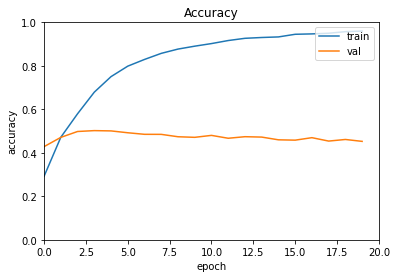

In [47]:
import matplotlib.pyplot as plt
plt.plot(history2.history['accuracy'])  
plt.plot(history2.history['val_accuracy'])  
plt.title('Accuracy') # 标题
plt.ylabel('accuracy') # x轴为epoch，y轴为loss
plt.xlabel('epoch')
plt.xlim(0, 20) 
plt.ylim(0, 1.0) 
plt.legend(['train','val'], loc='upper right') # 表明图例
plt.show() # 展示图片

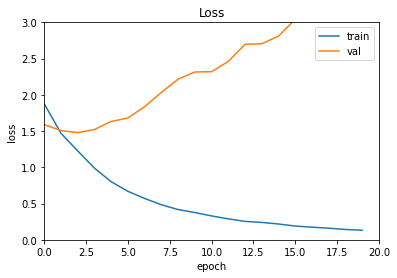

In [48]:
plt.plot(history2.history['loss'])  
plt.plot(history2.history['val_loss'])  
plt.title('Loss') # 标题
plt.ylabel('loss') # x轴为epoch，y轴为loss
plt.xlabel('epoch')
plt.xlim(0, 20) 
plt.ylim(0, 3)
plt.legend(['train','val'], loc='upper right') # 表明图例
plt.show() # 展示图片

### 简单LSTM模型

In [29]:
# 配置网络结构
def build_netword(num_vocabs):
    # 配置网络结构
    model = Sequential()
    model.add(Embedding(num_vocabs, embedding_size, input_length=txt_lenth)) # Embedding层为输入的词汇找到对应的向量    
    model.add(LSTM(32, dropout=0.2, recurrent_dropout=0.2)) # LSTM层    
    model.add(Dense(9)) # Dense层
    model.add(Dropout(0.05)) # Dropout层减轻过拟合
    model.add(Activation("softmax"))
    model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"]) # 输出层

    return model
  
model = build_netword(num_vocabs=vocab_size)
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 15, 50)            834500    
                                                                 
 lstm_6 (LSTM)               (None, 32)                10624     
                                                                 
 dense_12 (Dense)            (None, 9)                 297       
                                                                 
 dropout_3 (Dropout)         (None, 9)                 0         
                                                                 
 activation_1 (Activation)   (None, 9)                 0         
                                                                 
Total params: 845,421
Trainable params: 845,421
Non-trainable params: 0
_________________________________________________________________


In [30]:
# 训练模型
from keras.callbacks import ModelCheckpoint
mc = ModelCheckpoint('best_model_new.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)
# 设置CheckPoint，保存测试精度最优的模型
history1 = model.fit(text_digit, Y, validation_split = 0.2,batch_size=56, epochs=20, callbacks=[mc])

Epoch 1/20
320/320 [==============================] - ETA: 0s - loss: 1.8882 - accuracy: 0.2996
Epoch 00001: val_accuracy improved from -inf to 0.43567, saving model to best_model_new.h5
320/320 [==============================] - 16s 31ms/step - loss: 1.8882 - accuracy: 0.2996 - val_loss: 1.5686 - val_accuracy: 0.4357
Epoch 2/20
319/320 [============================>.] - ETA: 0s - loss: 1.4131 - accuracy: 0.5091
Epoch 00002: val_accuracy improved from 0.43567 to 0.51645, saving model to best_model_new.h5
320/320 [==============================] - 9s 29ms/step - loss: 1.4129 - accuracy: 0.5092 - val_loss: 1.4306 - val_accuracy: 0.5164
Epoch 3/20
320/320 [==============================] - ETA: 0s - loss: 1.1364 - accuracy: 0.6220
Epoch 00003: val_accuracy improved from 0.51645 to 0.53166, saving model to best_model_new.h5
320/320 [==============================] - 8s 26ms/step - loss: 1.1364 - accuracy: 0.6220 - val_loss: 1.4160 - val_accuracy: 0.5317
Epoch 4/20
320/320 [================

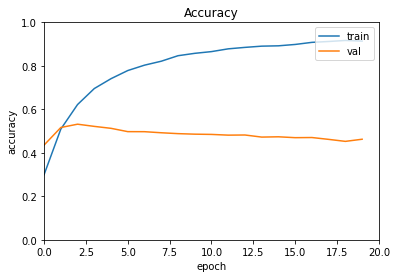

In [31]:
import matplotlib.pyplot as plt
plt.plot(history1.history['accuracy'])  
plt.plot(history1.history['val_accuracy'])  
plt.title('Accuracy') # 标题
plt.ylabel('accuracy') # x轴为epoch，y轴为loss
plt.xlabel('epoch')
plt.xlim(0, 20) 
plt.ylim(0, 1.0) 
plt.legend(['train','val'], loc='upper right') # 表明图例
plt.show() # 展示图片

* 模型精度在最初训练时提升很快，之后保持在50%左右。
* 可能的原因在于数据集，首先数据数量为2万条，有很多扩充的空间。
* 对不同的心理咨询问题打出判断的标签，与传统的文本分析不同，具有一定的主观性和模糊性，许多时候判断结果与句子中的关键词的联系比较弱。更多在于句子的内在的逻辑和隐含意思。

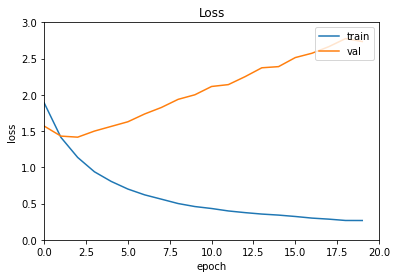

In [32]:
plt.plot(history1.history['loss'])  
plt.plot(history1.history['val_loss'])  
plt.title('Loss') # 标题
plt.ylabel('loss') # x轴为epoch，y轴为loss
plt.xlabel('epoch')
plt.xlim(0, 20) 
plt.ylim(0, 3)
plt.legend(['train','val'], loc='upper right') # 表明图例
plt.show() # 展示图片

### 模型对比

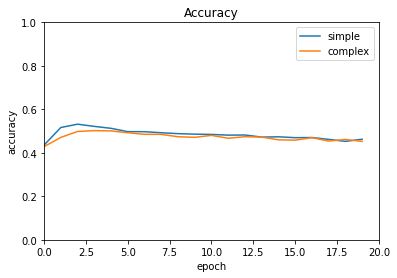

In [50]:
plt.plot(history1.history['val_accuracy'])   
plt.plot(history2.history['val_accuracy'])  
plt.title('Accuracy') # 标题
plt.ylabel('accuracy') # x轴为epoch，y轴为loss
plt.xlabel('epoch')
plt.xlim(0, 20) 
plt.ylim(0, 1.0) 
plt.legend(['simple','complex'], loc='upper right') # 表明图例
plt.show() # 展示图片

对于这个问题，使用简单LSTM的模型预测效果略高于带有Attention机制的双向LSTM模型

In [33]:
#保存模型
model.save("best_model_new.h5") 

# 加载预训练的模型
# model.load_weights("best_model_new.h5")

In [34]:
def predictor(sen):
    global txt_lenth
    sen_prosessed = sen.replace('，', '')
    sen_prosessed = sen_prosessed.replace('？', '')
    sen_prosessed = ".".join(jb.cut(sen_prosessed, cut_all=True))
    sen_prosessed = tokenizer.texts_to_sequences(sen_prosessed)
    sen_prosessed = pad_sequences(sen_prosessed, maxlen=txt_lenth, padding='post')
    result = model.predict(sen_prosessed)
    catalogue = list(result[0]).index(max(result[0]))
    threshold=0.8
    print(classes[catalogue])

In [35]:
sen = "高四社恐该不该分心去交点朋友还是就保持高冷"
predictor(sen)

行为
